# Simulasi fungsi gelombang Suara terdeam



Persamaan gelombang
$$ P(x,t)=P_0 e^{-αx} \sin⁡(kx-ωt)$$

## Ploting 3D

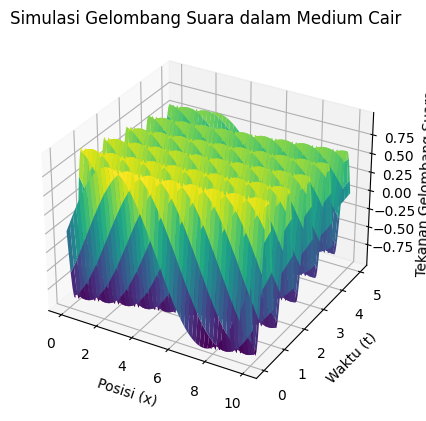

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameter simulasi
L = 10  # Panjang medium zat cair
T = 5   # Waktu simulasi
N = 100  # Jumlah titik dalam ruang dan waktu
alpha = 0.1  # Koefisien redaman
c = 1  # Kecepatan bunyi dalam medium

# Membuat grid ruang dan waktu
x = np.linspace(0, L, N)
t = np.linspace(0, T, N)
x, t = np.meshgrid(x, t)

# Parameter gelombang suara
P = 1  # Amplitudo gelombang
k = 2 * np.pi / L  # Bilangan gelombang
omega = 2 * np.pi  # Frekuensi sudut

# Persamaan gelombang suara
pressure_wave = P * np.sin(k * x - omega * t) * np.exp(-alpha * t)

# Plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, t, pressure_wave, cmap='viridis')

ax.set_xlabel('Posisi (x)')
ax.set_ylabel('Waktu (t)')
ax.set_zlabel('Tekanan Gelombang Suara')

plt.title('Simulasi Gelombang Suara dalam Medium Cair')
plt.show()


## Simulasi 1D animation

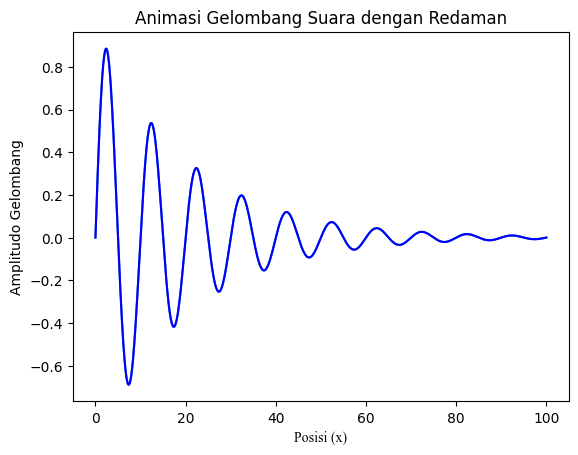

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image

# Parameter gelombang
P_max = 1.0
alpha = 0.05
k = 2 * np.pi / 10
f = 2500 # Frekuensi gelombang (hz)
omega = 2 * np.pi * f


# Fungsi gelombang suara dengan redaman
def sound_wave(x, t):
    return P_max * np.exp(-alpha * x) * np.sin(k * x - omega * t)

# Inisialisasi plot
fig, ax = plt.subplots()
x_vals = np.linspace(0, 100, 1000)
line, = ax.plot(x_vals, sound_wave(x_vals, 0))
ax.set_xlabel('Posisi (x)')
ax.set_ylabel('Amplitudo Gelombang')
ax.set_title('Animasi Gelombang Suara dengan Redaman')

# Fungsi pembaruan animasi
def update(frame):
    line.set_ydata(sound_wave(x_vals, frame))
    line.set_label(x_vals,)
    return line,

# Membuat animasi
ani = FuncAnimation(fig, update, frames=np.linspace(0, 50, 200), blit=True)
# ani.save('gelombang_suara.gif', writer='imagemagick', fps=30, dpi=300,)
plt.plot(x_vals, sound_wave(x_vals, 0), label='Gelombang Suara', color='blue')
plt.xlabel('Posisi (x)' ,fontname='Times New Roman')
plt.ylabel('Amplitudo Gelombang')
plt.title('Animasi Gelombang Suara dengan Redaman')
plt.savefig('gelombang_suara.png', dpi=300)
plt.show()


## simulasi pada berbagai medium

120 120 120


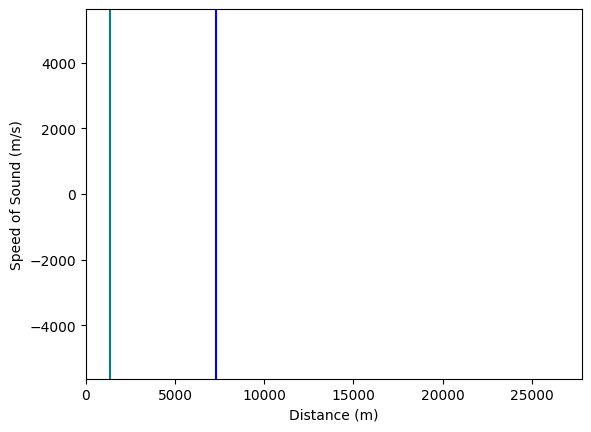

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
air_speed = 343  # speed of sound in air (m/s)
water_speed = 1481  # speed of sound in water (m/s)
iron_speed = 5130  # speed of sound in iron (m/s)
f = 1000
def wave(x):
    return np.sin(2* np.pi *f* x)

# x = np.linspace(0, 10, 1000)
# y = wave(x)
# plt.plot(x, y)
# Parameters
duration_air = 4  # duration of air simulation in seconds
duration_water = 4  # duration of water simulation in seconds
duration_iron = 4  # duration of iron simulation in seconds
fps = 30  # frames per second

# Calculate distances
distance_air = air_speed * duration_air
distance_water = water_speed * duration_water
distance_iron = iron_speed * duration_iron

# Create time arrays
time_air = np.linspace(0, duration_air, int(fps * duration_air))
time_water = np.linspace(duration_air, duration_air + duration_water, int(fps * duration_water))
time_iron = np.linspace(duration_air + duration_water, duration_air + duration_water + duration_iron, int(fps * duration_iron))

a = np.linspace(0, distance_air, len(time_air))
b = np.linspace(distance_air, distance_air + distance_water, len(time_water))
c = np.linspace(distance_air + distance_water, distance_air + distance_water + distance_iron, len(time_iron))
print(len(a), len(b), len(c))
# Create distance arrays
distance = np.concatenate([a,
                           b,
                           c])

distance2 = np.linspace(0, max(distance), len(distance))
# Create speed arrays
speed = np.concatenate([np.full_like(time_air, air_speed),
                        np.full_like(time_water, water_speed),
                        np.full_like(time_iron, iron_speed)])

speed = np.linspace(0, 0, len(distance))

# Create the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, distance_iron+distance_air+distance_water)
ax.set_ylim(-iron_speed-500, iron_speed + 500)
ax.set_xlabel('Distance (m)')
ax.axvline(distance_air, color="teal")
ax.axvline(distance_air+distance_water, color="blue")
ax.set_ylabel('Speed of Sound (m/s)')

# Update function for animation
def update(frame):
    line.set_data(distance[:frame], (speed[:frame] + wave(distance2[:frame]) * 1000))
    return line,

# Create animation
animation = FuncAnimation(fig, update, frames=len(distance), interval=1000 / fps)
plt.rcParams['animation.writer'] = 'pillow'
animation.save('wave.mp4', fps=fps, writer='ffmpeg', dpi=300)

# plt.show()


# Metode numerik Cranck-Nicolson

Persamaan diubah menjadi persamaan diferensial
$$\frac{∂^2 P}{dt^2 }=c^2  \frac{∂^2 P_0}{dx^2 }-2α \frac{∂P}{dt}  $$

## Ploting

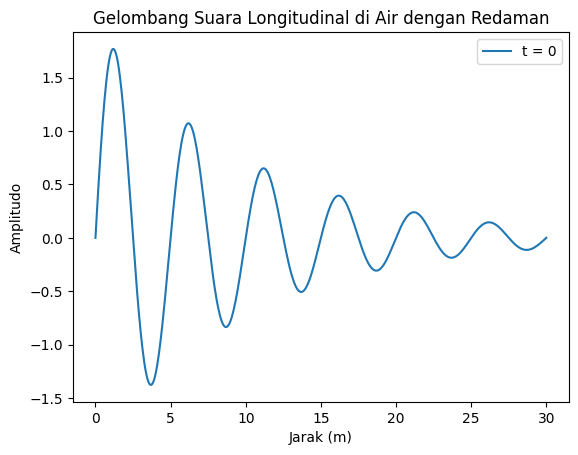

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# modul untuk menghitung solusi numerik dengan Crank-Nicolson
def crank_nicolson(P, alpha, k, dx, dt):
    Nx, Nt = P.shape
    A = np.zeros((Nx-2, Nx-2))

    # seting matriks tridiagonal untuk Crank-Nicolson
    for i in range(1, Nx-1):
        A[i-1, i-1] = 1 + alpha * dx / 2
        if i > 1:
            A[i-1, i-2] = -alpha * dx / 4
        if i < Nx-2:
            A[i-1, i] = -alpha * dx / 4

    # iterasi untuk setiap langkah waktu
    for n in range(1, Nt):
        b = P[1:Nx-1, n-1] + alpha * dx / 2 * (P[2:Nx, n-1] - 2 * P[1:Nx-1, n-1] + P[:Nx-2, n-1])
        P[1:Nx-1, n] = np.linalg.solve(A, b)

    return P

# modul untuk kondisi awal dan inisialisasi array
def initialize_arrays(Nx, Nt):
    P_numerical = np.zeros((Nx, Nt+1))
    P_analytic = np.zeros((Nx, Nt+1))
    return P_numerical, P_analytic

# Simulation parameters ini boleh di edit
L       = 30.0                 #panjang medium
T       = 10.0                #waktu total simulasi
Nx      = 500                  #jumlah langkah ruang
Nt      = 500                  #jumlah langkah waktu
alpha   = 0.1                  #koefisien redaman
f       = 100.0                 #frekuensi gelombang suara
P_max   = 2.0                  #tekanan maksimum
t       = 1                     #waktu
v       = 1                    #kecepatan gelombang


## ini jangan di edit
omega   = 2 * np.pi * f        #bilangan gelombang
lambd   = v/f               #panjang gelombang
k       = 2 * np.pi/lambd     #bilangan gelombang
dx      = L / (Nx - 1)       #delta x
dt      = T / Nt             #delta t

# inisialisasi array
x = np.linspace(0, L, Nx)
t_values = np.linspace(0, T, Nt+1)
P_numerical, P_analytic = initialize_arrays(Nx, Nt)

# Inisisalisasi kondisi awal
P_numerical[:, 0] = P_max * np.exp(-alpha * x) * np.sin(k * x - omega * t)

# solusi numerik dengan Crank-Nicolson
P_numerical = crank_nicolson(P_numerical, alpha, k, dx, dt)


#plotting
plt.plot(x, P_numerical[:, 0], label='t = 0')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Amplitudo')
plt.title('Gelombang Suara Longitudinal di Air dengan Redaman')
plt.show()


## perhitungan nilai error

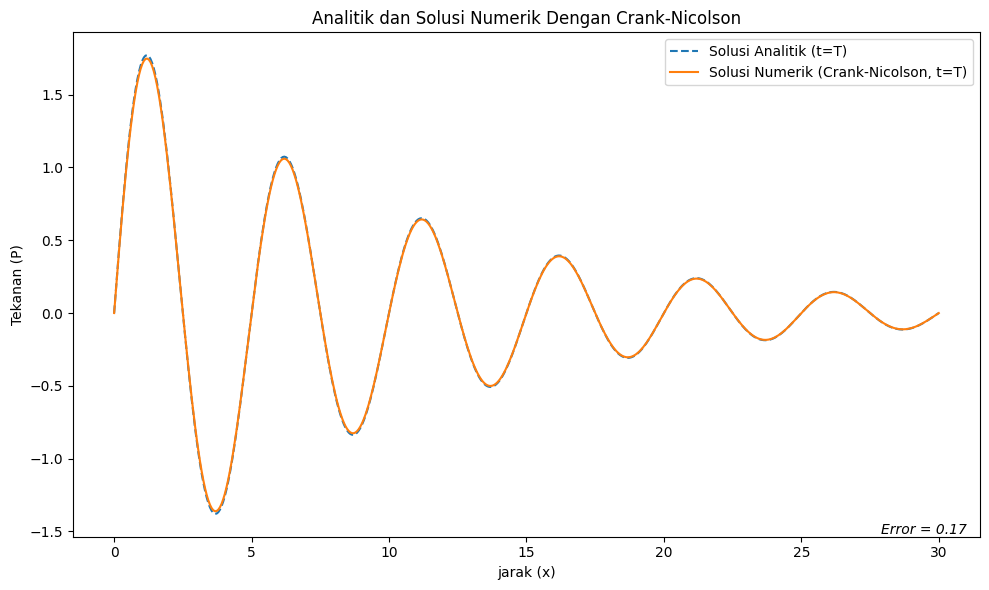

Final error = 0.1670564537433148


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def crank_nicolson(P, alpha, k, dx, dt):
    Nx, Nt = P.shape
    A = np.zeros((Nx-2, Nx-2))

    # setting matriks tridiagonal untuk Crank-Nicolson
    for i in range(1, Nx-1):
        A[i-1, i-1] = 1 + alpha * dx / 2
        if i > 1:
            A[i-1, i-2] = -alpha * dx / 4
        if i < Nx-2:
            A[i-1, i] = -alpha * dx / 4

    # iterasi untuk setiap langkah waktu
    for n in range(1, Nt):
        b = P[1:Nx-1, n-1] + alpha * dx / 2 * (P[2:Nx, n-1] - 2 * P[1:Nx-1, n-1] + P[:Nx-2, n-1])
        P[1:Nx-1, n] = np.linalg.solve(A, b)

    return P


def analytic_solution(x, t, P_max, alpha, k):
    return P_max * np.exp(-alpha * x) * np.sin(k * x - alpha * k * t)

def initialize_arrays(Nx, Nt):
    P_numerical = np.zeros((Nx, Nt+1))
    P_analytic = np.zeros((Nx, Nt+1))
    return P_numerical, P_analytic

# Simulation parameters
# Simulation parameters ini boleh di edit
L       = 30.0                #panjang medium
T       = 10.0                #waktu total simulasi
Nx      = 500                 #jumlah langkah ruang
Nt      = 500                 #jumlah langkah waktu
alpha   = 0.1                 #koefisien redaman
f       = 100.0               #frekuensi gelombang suara
P_max   = 2.0                 #tekanan maksimum
t       = 1                   #waktu
v       = 1                   #kecepatan gelombang


## ini jangan di edit
omega   = 2 * np.pi * f         #bilangan gelombang
lambd   = v/f                   #panjang gelombang
k       = 2 * np.pi/lambd       #bilangan gelombang
dx      = L / (Nx - 1)          #delta x
dt      = T / Nt                #delta t

# inisisalisasi array
x = np.linspace(0, L, Nx)
t_values = np.linspace(0, T, Nt+1)
P_numerical, P_analytic = initialize_arrays(Nx, Nt)

# inisisalisasi kondisi awal
P_numerical[:, 0] = P_max * np.exp(-alpha * x) * np.sin(k * x - omega  * t)

# solusi numerik dengan Crank-Nicolson
P_numerical = crank_nicolson(P_numerical, alpha, k, dx, dt)

# sulusi analitik
for n in range(Nt+1):
    P_analytic[:, n] = analytic_solution(x, t_values[n], P_max, alpha, k)

# perhitungan error
error = np.sqrt(np.sum((P_numerical - P_analytic)**2, axis=0))

# Plotting
plt.figure(figsize=(10, 6))

# plot solusi numerik dan analitik
plt.plot(x, P_analytic[:, -1], label='Solusi Analitik (t=T)', linestyle='--')
plt.plot(x, P_numerical[:, -1], label='Solusi Numerik (Crank-Nicolson, t=T)' )
# plt.text(-0, -(P_numerical), 'Eror = %.2f' % error[-1], fontsize=15)
plt.text(1, 0, 'Error = %.2f   ' % error[-1], fontsize=10, fontweight='normal', fontstyle='italic', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='bottom')


plt.xlabel('jarak (x)')
plt.ylabel('Tekanan (P)')
plt.legend()
plt.title('Analitik dan Solusi Numerik Dengan Crank-Nicolson')

# print(f'Analitic = {P_analytic[:,-1]},Numerik = {P_numerical[:,-1]} \n')
# Plot error
# plt.subplot(2, 1, 2)
# plt.plot(t_values, error, label='Error')
# plt.xlabel('Time (t)')
# plt.ylabel('Error')
# plt.title('Error Evolution between Numerical and Analytic Solutions')

plt.tight_layout()
plt.show()

print('Final error =', error[-1])
